<a href="https://colab.research.google.com/github/Bensayah/Time-Series/blob/master/Copy_of_Fuzzy_c_means_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np, numpy.random
#from scipy.spacial import distance  
import scipy as sc 
!pip install fuzzy-c-means

In [49]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [50]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [51]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2,-2), size=(n_samples, 3)),
    np.random.normal((2, 2,2), size=(n_samples, 3))
))

In [7]:
X.shape

(6000, 3)

In [8]:
#X=np.array([[1,2],[2, 3],[9,4],[10,1],[1.5,2.3],[2.4, 3.3],[9.5,4.1],[10.2,1.5]])

## Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler


In [53]:
# Create the scaler
scaler = MinMaxScaler()

In [54]:
# Fit the scaler to the numeric columns
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [55]:
# Transform and replace the numeric columns
X = scaler.transform(X)

In [56]:
X

array([[0.35465769, 0.37723113, 0.36925105],
       [0.35148397, 0.27246317, 0.44141417],
       [0.3220561 , 0.40752474, 0.39522259],
       ...,
       [0.65461237, 0.70747709, 0.62074621],
       [0.56057176, 0.76946613, 0.81715628],
       [0.83721599, 0.67825827, 0.70770882]])

In [57]:
# show the boundedness of data
X.min(), X.max()

(0.0, 1.0)

## Multilayer autoencoder

In [58]:
input_size = 3
hidden_size = 128
code_size = 2

In [59]:
# ENCODER

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(code_size, activation='relu')(hidden_1)

In [60]:
# DECODER

hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(input_size, activation='sigmoid')(hidden_2)


In [61]:
model_encoder = Model(x, h)
autoencoder = Model(x, r)
autoencoder.compile(optimizer='adam', loss='mse')

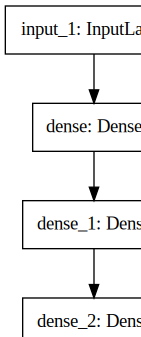

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

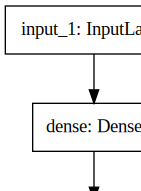

In [20]:
SVG(model_to_dot(model_encoder).create(prog='dot', format='svg'))

## Splitting data

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X, 
                                  X, 
                                  test_size=0.25,
                                  random_state=42)

In [64]:
train_inputs

array([[0.42896257, 0.31120398, 0.35666876],
       [0.54643433, 0.64643369, 0.72150858],
       [0.63689122, 0.63542953, 0.77693951],
       ...,
       [0.72949935, 0.74072973, 0.70997608],
       [0.72961931, 0.66926834, 0.76082556],
       [0.27429654, 0.32370046, 0.38030073]])

In [65]:
train_targets

array([[0.42896257, 0.31120398, 0.35666876],
       [0.54643433, 0.64643369, 0.72150858],
       [0.63689122, 0.63542953, 0.77693951],
       ...,
       [0.72949935, 0.74072973, 0.70997608],
       [0.72961931, 0.66926834, 0.76082556],
       [0.27429654, 0.32370046, 0.38030073]])

## Training data

In [66]:
epochs = 5
batch_size = 128

history = autoencoder.fit(train_inputs, train_targets, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(val_inputs,val_targets))

Epoch 1/5
36/36 [==============================] - 1s 10ms/step - loss: 0.0385 - val_loss: 0.0320
Epoch 2/5
36/36 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.0104
Epoch 3/5
36/36 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0058
Epoch 4/5
36/36 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 5/5
36/36 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0053


## Predict on the test set

In [78]:
X_coded=model_encoder.predict(X)
X_coded.shape

(6000, 2)

In [94]:
np.array(fcm_centers)

array([[0.69860005, 0.6812316 , 0.69982827],
       [0.33776826, 0.3123977 , 0.34252807]], dtype=float32)

In [93]:
X

array([[0.35465769, 0.37723113, 0.36925105],
       [0.35148397, 0.27246317, 0.44141417],
       [0.3220561 , 0.40752474, 0.39522259],
       ...,
       [0.65461237, 0.70747709, 0.62074621],
       [0.56057176, 0.76946613, 0.81715628],
       [0.83721599, 0.67825827, 0.70770882]])

In [96]:
X_centers_coded=model_encoder.predict(np.array(fcm_centers))
X_centers_coded

array([[1.6149919 , 0.4385427 ],
       [0.4206423 , 0.71549606]], dtype=float32)

In [79]:
X_decoded = autoencoder.predict(X)
X_decoded.shape

(6000, 3)

In [80]:
# fcm for X_decoded = X'
fcm = FCM(n_clusters=2)
fcmdecoded = FCM(n_clusters=2)
fcm_z = FCM(n_clusters=2)
fcm.fit(X)
fcmdecoded.fit(X_decoded)
fcm_z.fit(X_decoded)

In [81]:
from mpl_toolkits.mplot3d import Axes3D

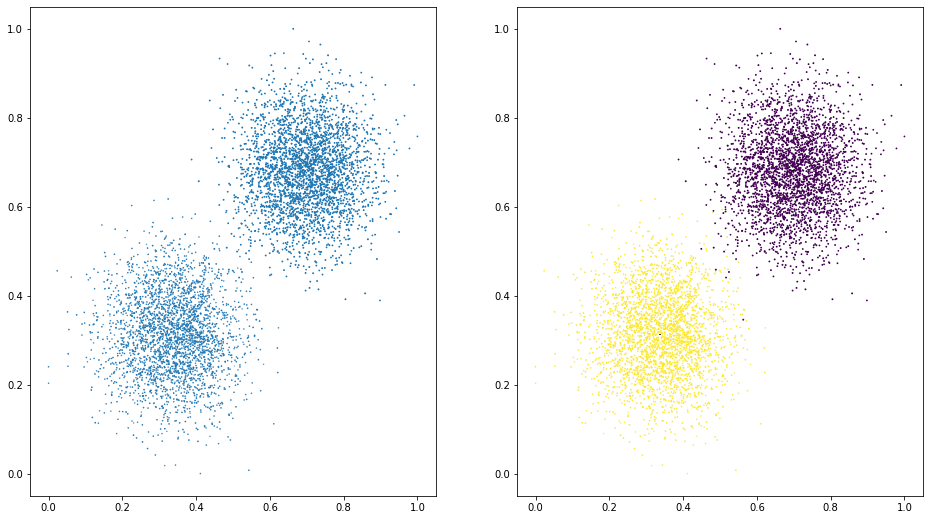

In [71]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].scatter(X[:,0], X[:,1],X[:,2])
axes[1].scatter(X[:,0], X[:,1],X[:,2], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1],fcm_centers[:,2], marker="+", c='black')
plt.savefig('/content/drive/MyDrive/basic-clustering-output_X.jpg')
plt.show()

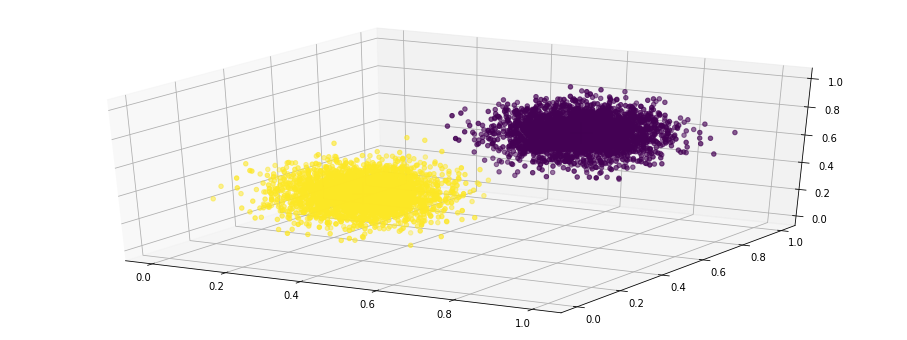

In [82]:
fig = plt.figure(figsize=(16,6))

ax = fig.add_subplot(121, projection='3d')

ax.scatter(X[:,0], X[:,1],X[:,2])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],X[:,2], c=fcm_labels)
ax.scatter(fcm_centers[:,0], fcm_centers[:,1],fcm_centers[:,2], marker="+", s=500, c='black')
plt.savefig('/content/drive/MyDrive/basic-clustering-output_X1.jpg')

plt.show()

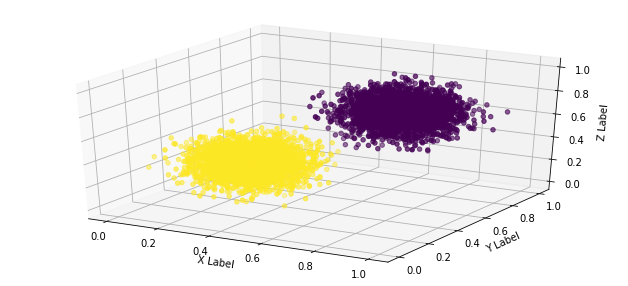

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],X[:,2], c=fcm_labels)
ax.scatter(fcm_centers[:,0], fcm_centers[:,1],fcm_centers[:,2], marker="x", s=500, c='b')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.savefig('/content/drive/MyDrive/basic-clustering-output_X.jpg')
plt.show()

In [74]:
X[:,0]

array([0.35465769, 0.35148397, 0.3220561 , ..., 0.65461237, 0.56057176,
       0.83721599])

In [75]:
fcm_centers

DeviceArray([[0.69860005, 0.6812316 , 0.69982827],
             [0.33776826, 0.3123977 , 0.34252807]], dtype=float32)

In [35]:
fcm_labels

DeviceArray([0, 0, 0, ..., 1, 1, 1], dtype=int32)

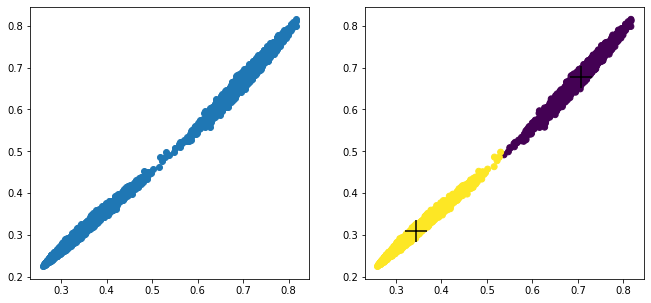

In [84]:
# outputs decoded
fcmdecoded_centers = fcmdecoded.centers
fcmdecoded_labels = fcmdecoded.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X_decoded[:,0], X_decoded[:,1])
axes[1].scatter(X_decoded[:,0], X_decoded[:,1], c=fcmdecoded_labels)
axes[1].scatter(fcmdecoded_centers[:,0], fcmdecoded_centers[:,1], marker="+", s=500, c='black')
plt.savefig('/content/drive/MyDrive/basic-clustering-output_decoded.jpg')
plt.show()

In [85]:
fcmdecoded_centers

DeviceArray([[0.7062264 , 0.67832035, 0.7050236 ],
             [0.34446946, 0.3086545 , 0.34070706]], dtype=float32)

In [86]:
fcmdecoded_labels

DeviceArray([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [87]:
fcm_coded = FCM(n_clusters=2)
fcm_coded.fit(X_coded)

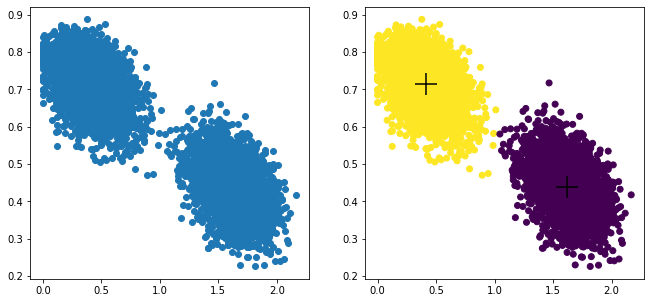

In [88]:
# outputs coded
fcmcoded_centers = fcm_coded.centers
fcmcoded_labels = fcm_coded.predict(X_coded)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X_coded[:,0], X_coded[:,1])
axes[1].scatter(X_coded[:,0], X_coded[:,1], c=fcmcoded_labels)
axes[1].scatter(fcmcoded_centers[:,0], fcmcoded_centers[:,1], marker="+", s=500, c='black')
plt.savefig('/content/drive/MyDrive/basic-clustering-output_decoded.jpg')
plt.show()

In [89]:
fcmcoded_centers

DeviceArray([[1.6167543 , 0.4386581 ],
             [0.413531  , 0.71429473]], dtype=float32)

In [98]:
# outputs coded
coded_centers = model_encoder.predict(np.array(fcm_centers))
coded_centers


array([[1.6149919 , 0.4385427 ],
       [0.4206423 , 0.71549606]], dtype=float32)